## Stochastic gradient descent

SGD算法是一个特殊的RM算法

mean estimation算法也是特殊的SGD算法

那么这个SGD主要是解决什么问题的呢？

它其实是用来解决**优化**问题的

假设如下优化问题： $\min_{w} J(w) = E[f(w,x)]$

这其实就是求一个w，使得值最小

---

又一般说来，求一个最值问题，会需要把一个方程求导，然后令导数为0即可，当然，这样需要一点条件，不然导数为0，不一定能取得最值。

在这里，同理这里需要一个极其苛刻的条件，**需要满足二阶导大于0**，这样通过使一阶导==0，就能得到全局最小值了。

## Gradient Descent(GD)
梯度下降，顾名思义就是函数往梯度下降的方向走，这样容易趋近最小值
$W_{k+1} = w_k - a_k*\nabla _wE[f(w_k,X)] = w_k-a_k[\nabla _wf(w_k,X)]$

在这个式子里面，其实w才是“未知”量，x是一个随机噪音，它通过采样获取。而w就是我们平常意义下的自变量，可以对它求导分析。

那我们其实可以看出来，在$X\equiv 0$时，其实那个$\nabla _wE[f(w_k,X)]$可以退化成$\nabla _wf(w_k)$ 也就是此时的所有的“梯度”，都是**真·梯度**了。不需要通过各种采样，把**真·梯度**给弄出来



有一丢丢理解了，$\min_w \ \ \ {J(w)} =E[f(w,X)] = E[\frac{1}{2}\left \|  w-X\right \|^2  ]$这个式子想表达的意思是：

$w$是变量

$X$是在$w$取定之后，再随机得到的随机变量，其实得写成$X_w$

然后这个是model-based的题目，也就是我是知道题目的方程是什么的。这题的目的，开上帝视角可以知道，这题其实目的是令自变量$w$不断接近于$E(x)$ 

那么轻易算得$\nabla _wf(w,X_w)=E(w-X_w) = w-E(X)$

那么这题其实过于简单只需要第一次就把$X$的期望算出来，后面就再也不用算了，这也就是传说中的**GD算法**

In [417]:
#这里我们基于梯度，通过RM算法求梯度==0

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# SGD
X = np.random.randint(-10, 10,size =(1000,2))

def train_mean_estimation(batch_size, note):
    w = np.array([0,0])
    results = np.array([[0,0]])
    for i in range(0,1000):
        batch = np.random.randint(0,1000,size=batch_size)
        w = w - 1/(i+1)*(w-X[batch].mean(axis=0))
        results = np.append(results,[w],axis=0)
        
    plt.figure(figsize=(8,3))
    plt.plot(results[:,0],label='x')
    plt.plot(results[:,1],label='y')
    plt.yticks(np.arange(-5,5,1))
    plt.legend()
    plt.title(note)
    plt.show()
    #可以看到，得迭代很多次才收敛

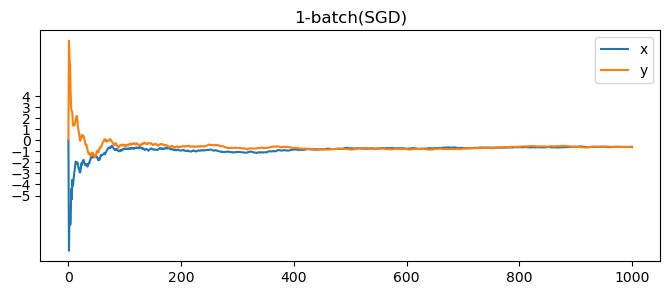

In [5]:
train_mean_estimation(batch_size=1,note="1-batch(SGD)")

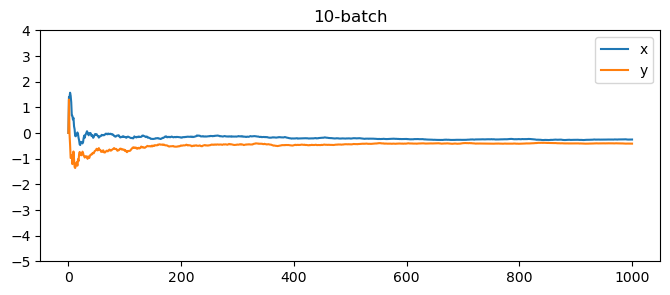

In [6]:
train_mean_estimation(batch_size=10,note="10-batch")

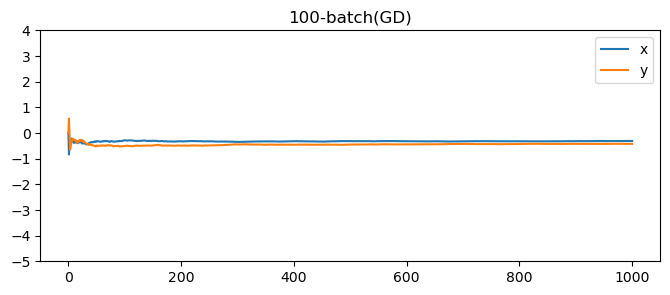

In [7]:
train_mean_estimation(batch_size=100,note="100-batch(GD)")

这里再弄一个新的例子，是用GD，MGD，SGD拟合 $y=x^2+5x+x$的方程

我们这里定义损失函数 $loss = (y-\hat{y})^2$ 即，均方误差

然后对$loss$对$w$进行求梯度

我们假设$w=\begin{bmatrix}w_1\\w_2\\w_3\end{bmatrix}$是三维列向量，表示函数的系数，$X=\begin{bmatrix}x^2\\x^1\\x^0\end{bmatrix}$也是三维列向量，表示样本

于是$loss=(w^TX-A^TX)^2=((w^T-A^T)X)^2$

那么我们知道，求梯度，其实就是对$w$的每个分量进行求偏导

记$tmp=(w^T-A^T)X = \hat{y}-y\ \ \ $化简得$\nabla loss = 2*tmp*X=2*(\hat{y}-y)
*\begin{bmatrix}x^2\\x^1\\x^0\end{bmatrix}$



}$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 先初始化一个列表，未来要在这100个样本里面再sample出来
np.random.seed(0)
X = np.linspace(-10, 10, 1000)
Y = 2 * X ** 2 + 3*X +5 

In [10]:
#定义二次函数
def quadratic_function(X, a, b, c):
    return a * X ** 2 + b * X + c
#定义损失函数
def loss_function(Y_pred, Y):
    return np.mean((Y_pred - Y)**2)

In [88]:
def train(learning_rate, batch_size, note):
    # a,b,c就是上面所说的 [w1,w2,w3]
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    loss = 1000
    cnt = 0 
    results = np.array([0])
    while loss > 0.01:
        cnt += 1
        batch = np.random.randint(0,1000,size=(1,batch_size))
    
        x = X[batch]
        y = Y[batch]
    
        y_pred = quadratic_function(x,a,b,c)

        loss = loss_function(y_pred,y)
        results = np.append(results,loss)
        # 这些是计算得到的梯度
        grad_a = (2 * (y_pred - y) * x ** 2).mean()
        grad_b = (2 * (y_pred - y) * x).mean()
        grad_c = (2 * (y_pred - y)).mean()
    
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        valid_batch = np.random.randint(0,1000,size=(1,5))
        x = X[valid_batch]
        y = Y[valid_batch]
        y_pred = quadratic_function(x,a,b,c)
        loss = loss_function(y_pred,y)
        
        # results = np.append(results,loss)
    
    print("最终系数为：",a,b,c)
    print("最后迭代次数：",cnt)
    y_pred = quadratic_function(X,a,b,c)
    plt.figure(figsize=(8,3))
    # plt.plot(X,y_pred,label="predict")
    plt.plot(X,Y,label="target")
    plt.plot(X,y_pred,label="predict")
    plt.title(note)
    plt.legend()
    plt.show()
    # print(a,b,c)

    plt.figure(figsize=(8,3))
    plt.plot(results[:150],label='x')
    # plt.plot(results[:,1],label='y')
    # plt.yticks(np.arange(-5,5,1))
    plt.legend()
    plt.title(note)
    plt.show()

学习率调高了有概率收敛不了

调节batch_size 从而确定GD还是SGD还是MGD

若想使用SGD 调节为1即可

最终系数为： 2.014503336479273 2.99896641076744 4.222936433155403
最后迭代次数： 25120


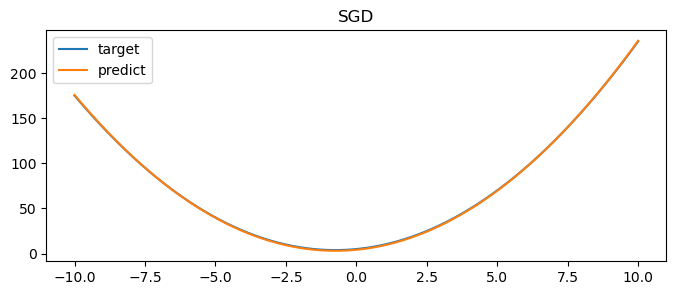

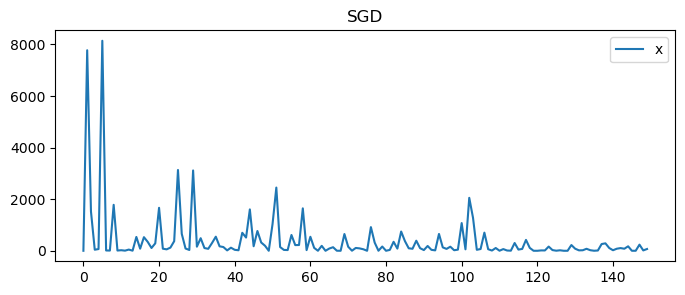

In [89]:
train(learning_rate=0.0001,batch_size = 1,note="SGD")

最终系数为： 2.008732506620374 2.9968403526643916 4.4737372583615445
最后迭代次数： 25553


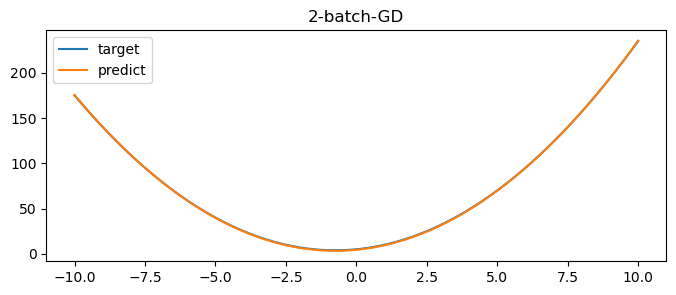

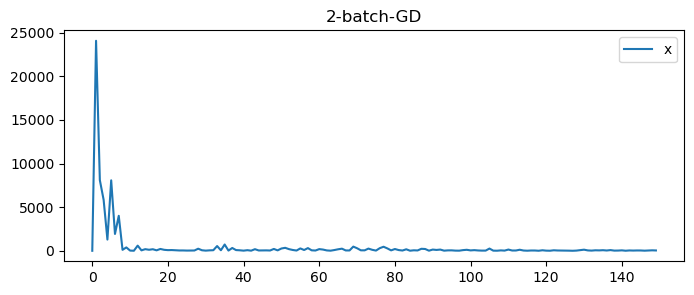

In [90]:
train(learning_rate=0.0001,batch_size = 2,note="2-batch-GD")

最终系数为： 2.0103233158414575 3.001042617593142 4.315396878649175
最后迭代次数： 25251


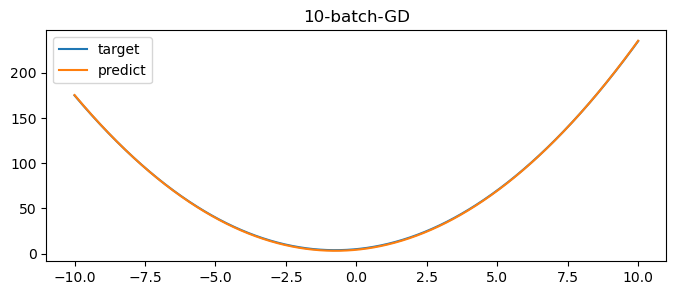

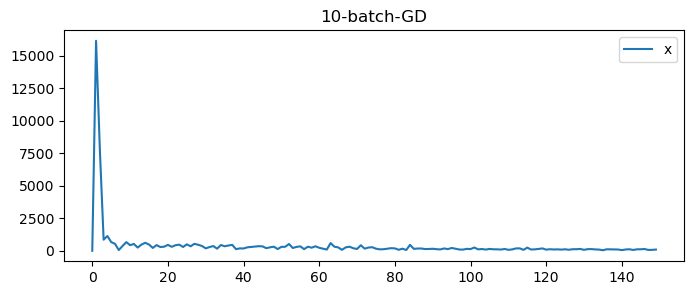

In [91]:
train(learning_rate=0.0001,batch_size = 10,note="10-batch-GD")

最终系数为： 2.015854531184876 2.9998966422578417 3.988713399434743
最后迭代次数： 20036


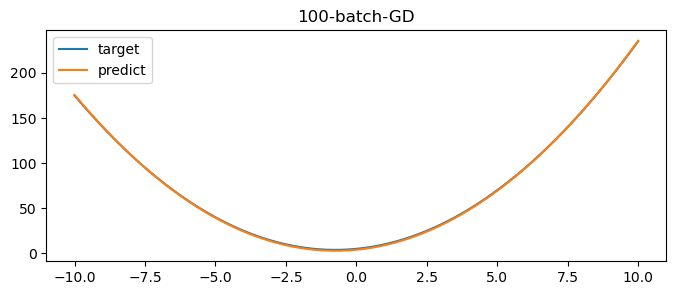

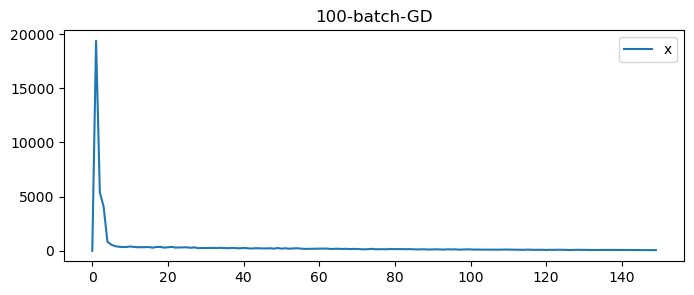

In [92]:
train(learning_rate=0.0001,batch_size = 100,note="100-batch-GD")